# Simulating a AWGN channel

In this notebook, a AWGN channel in which white Gaussian noise with zero mean and some variance is added to the transmitted signal. Here, the objective is to obtain a plot of the probability of error as a function of the variance of the noise added by the channel. The expected curve is a waterfall curve.

__Note__: this notebook assumes the knowledge of some of the basics of digital communication such as modulation, AWGN channels, etc.

## Theory

Consider the following setup.

- The communication system consists of two N-dimensional constellation points $X_1$ and $X_2$ separated by a distance $d$ i.e $ \| X_1 - X_2 \| = d$.
- Both the transmission (data) symbols are equiprobable.
- The channel is a AWGN channel that adds Gaussian noise to produce the output $Y$ given by 

\begin{equation}
Y = X + n
\end{equation}

where $X$ is the transmitted symbol and n is noise with the distribution $n \sim N(0,N_0/2)$.

The decision rule is then to declare that as the transmitted symbol to which $Y$ is closest. The probability of error in this case is given by 

\begin{equation}
P_{error} = Q \left(\frac{d}{\sqrt{2N_0}}\right)
\end{equation}

where the Q function is given by 

\begin{equation}
Q(x) = \frac{1}{\sqrt{2\pi}} \int_x^{\infty} e^{-\frac{u^2}{2}} du
\end{equation}


## Plot of the theoretical probability of error

In [11]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})
import numpy as np
import scipy 
from scipy.stats import norm

from tools import *

In [12]:
# parameters of the distribution
d = 2
mu = 0
N0 = 1
sigma = np.sqrt(N0/2)

In [20]:
# variation of N0
n = np.linspace(0.2, 2, 50)

In [34]:
# Qs 
# Note that the formula is Q(d/2sigma)
# This is to use the standard normal distribution
# Therefore, there is no need to specify loc and
# scale i the norm.sf function
Q_theory = norm.sf(d/np.sqrt(2*n))

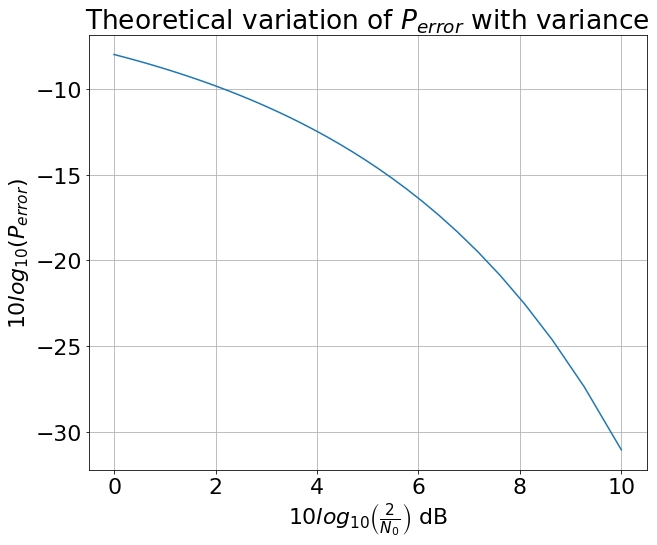

In [35]:
# plotting the waterfall curve 
plt.figure(figsize = (10,8))
plt.grid()
plt.title("Theoretical variation of $P_{error}$ with variance")
plt.xlabel("$10log_{10} \\left( \\frac{2}{N_0} \\right)$ dB")
plt.ylabel("$ 10 log_{10} \\left( P_{error} \\right) $")
plt.plot(10*np.log10(2/n), 10*np.log10(Q_theory))
plt.show()

## Simulating the AWGN channel using Monte Carlo

The above is the curve obtained through theoretical calcuations. This can be verified by simulating the behaviour of a AWGN channel for a number of trials and then concluding the $P_{error}$ using the law of large numbers. This can be done in the following steps:

- Choose a symbol to be transmitted. Note that the symbols are equiprobable.
- Draw a sample from a Normal distribution of 0 mean and variance \frac{N_0}{2} and add it to the transmitted symbol.
- Since both symbols ar equiprobable, declare 1 if $Y > 0$ and -1 if $Y < 0$.
- Repeat this $10^5$ times to determine the probability of error for a given $N_0$. 
- Repeat above steps for varying values of $N_0$ to obtain the above curve.

__Note__: The number of iterations is given by $\frac{100}{\text{Error to be determined}}$.

In [37]:
# number of iterations per n
numiter = 10**5
# empirically computed errors
perror = []

for nindex in range(len(n)):
    n0 = n[nindex]
    count_error = 0
    for _ in range(numiter):
        X = symbol_transmitted_binary()
        noise = np.random.normal(loc = mu, scale = np.sqrt(n0/2))
        Y = X + noise
        if Y > 0:
            Xhat = 1
        else:
            Xhat = -1
        if Xhat != X:
            count_error = count_error + 1
    perror.append(count_error/ numiter)
    

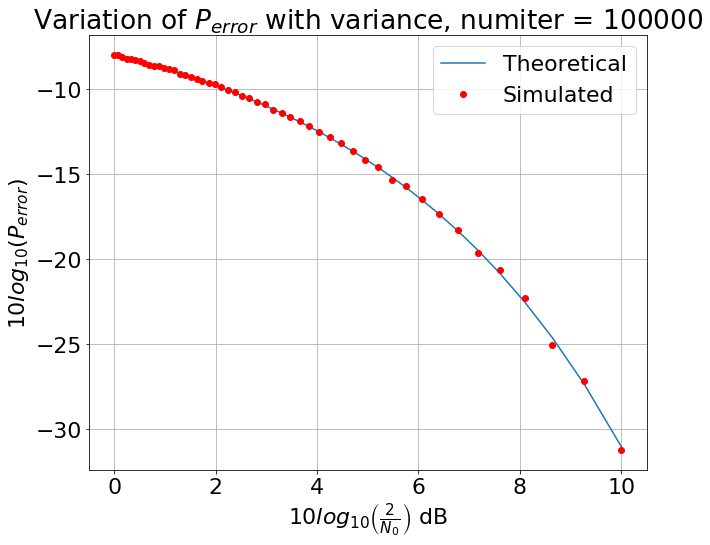

In [42]:
# plotting the theoretical and practical curves for comparison
plt.figure(figsize = (10,8))
plt.grid()
plt.title("Variation of $P_{error}$ with variance, numiter = " + str(numiter))
plt.xlabel("$10log_{10} \\left( \\frac{2}{N_0} \\right)$ dB")
plt.ylabel("$ 10 log_{10} \\left( P_{error} \\right) $")
plt.plot(10*np.log10(2/n), 10*np.log10(Q_theory), label = "Theoretical")
plt.plot(10*np.log10(2/n), 10*np.log10(perror), "ro", label = "Simulated")
plt.legend()
plt.show()

The simulated waterfall curve agrees closely with the theoretical value confirming that the theoretical analysis is correct. Further, the rule of thumb for the selection of the value of numiter also seems to hold true as the for values a magnitude of order or more less than 1e5, the agreement is much poorer.